In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
from scipy import stats
from sklearn.preprocessing import QuantileTransformer

#from sklearn.linear_model import LinearRegression


In [2]:
# X-y split.
# Normalize (numerical).
# One Hot/Label Encoding (categorical).

In [3]:
df_c = pd.read_csv("/Users/macbookpro/Documents/GitHub/IronBiagio/Lab/Data_Tableau/Data_Marketing_Customer_Analysis_Round2_cleaned.csv")

### Replacing and dropping Null values and columns


In [5]:
df_c.Response = df_c.Response.fillna('No')

In [6]:
df_c.drop(['Effective To Date'],axis=1, inplace=True)
df_c.drop(['Customer'], axis=1, inplace=True)
df_c.drop(['Number of Open Complaints'], axis=1, inplace=True)

In [7]:
#delete all Na values and their relative rows
df_c = df_c.dropna()

Text(0.5, 1.0, 'Months Since Policy Inception')

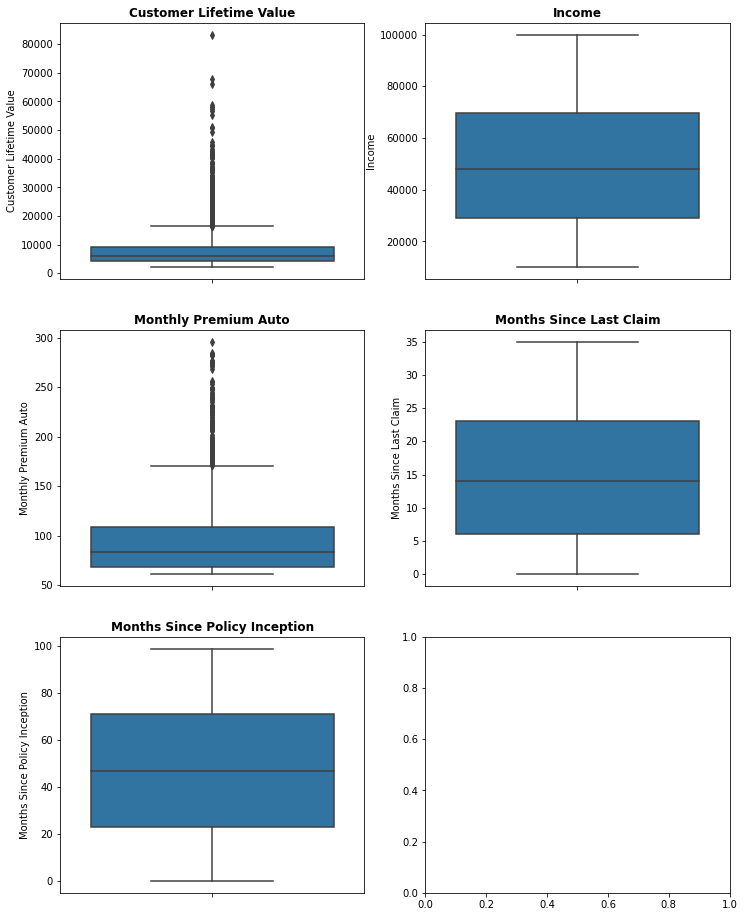

In [8]:
#use boxplot to see outlier distributions on numerical columns
fig2, ax2 = plt.subplots(3,2, figsize=(12,16))

sns.boxplot(y=df_c['Customer Lifetime Value'], ax = ax2[0,0])
ax2[0,0].set_title('Customer Lifetime Value', fontweight='bold')

sns.boxplot(y=df_c['Income'], ax = ax2[0,1])
ax2[0,1].set_title('Income', fontweight='bold')

sns.boxplot(y=df_c['Monthly Premium Auto'], ax = ax2[1,0])
ax2[1,0].set_title('Monthly Premium Auto', fontweight='bold')

sns.boxplot(y=df_c['Months Since Last Claim'], ax = ax2[1,1])
ax2[1,1].set_title('Months Since Last Claim', fontweight='bold')

sns.boxplot(y=df_c['Months Since Policy Inception'], ax = ax2[2,0])
ax2[2,0].set_title('Months Since Policy Inception', fontweight='bold')

### Removing outliers


In [10]:
Q1 = df_c["Customer Lifetime Value"].quantile(0.25)
Q3 = df_c["Customer Lifetime Value"].quantile(0.75)
IQR = Q3 - Q1 
df_c = df_c[(df_c["Customer Lifetime Value"] >= Q1 - 1.5 * IQR) & (df_c["Customer Lifetime Value"] <= Q3 + 1.5 *IQR)]


In [11]:
#mean_clv = np.mean(customer_df['Customer Lifetime Value'])
#std_clv = np.std(customer_df['Customer Lifetime Value'])

#threshold = 3
#outliers_clv = []
#for i in customer_df['Customer Lifetime Value']:
    #z = (i-mean_clv)/std_clv
    #if z > threshold:
        #outliers_clv.append(i)
#print(outliers_clv)

### X-Y split

In [13]:
X = df_c.drop(columns ="Total Claim Amount")
Y = df_c["Total Claim Amount"]

### Data Transformation

In [14]:
#split X to numeric and categorical and switch 2 columns that have numbers into categorical as it's best suited
X_cat= X.select_dtypes("object")
X_num = X._get_numeric_data()

In [15]:
#switch this two columns into the categoricals df
#X_cat['Number of Open Complaints'] = df_c['Number of Open Complaints']
X_cat['Number of Policies'] = df_c['Number of Policies']
X_num.drop(columns=['Number of Policies'], inplace=True)

/var/folders/2c/wl35d59s78q2s8_vnnh5zj3c0000gn/T/ipykernel_35417/3206818642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat['Number of Policies'] = df_c['Number of Policies']


In [16]:
#X_cat

In [17]:
#Convert categorical variable into dummy variables
Cat_col=pd.get_dummies(X_cat, drop_first=True)

In [18]:
#rejoin the data frame but with dummy variables instead of categoricals
X = pd.concat([X_num, Cat_col], axis=1)

In [19]:
#removed the least 6 imporatant features as they decrease the model score
#X.drop(columns = ["Effective To Date_2/21/11", "Vehicle Size_Small", "Effective To Date_1/25/11"], inplace = True)

### Train Test Split

In [20]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=123)



In [21]:
#standardize the data
std_scaler=StandardScaler().fit(X_train) 
X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [22]:
#create a model for a linear regression
model = LinearRegression()
model.fit(X_train_scaled, Y_train)
#model.coef_
#model.intercept_

LinearRegression()

In [23]:
#R2 for test
R2_test=model.score(X_test_scaled,Y_test)
print(R2_test)
Adj_R2= 1 - (1-R2_test)*(len(Y_test)-1)/(len(Y_test)-X_test_scaled.shape[1]-1)
print(Adj_R2)

0.8060291446406795
0.7895793194511965


In [24]:
# R2 for train
R2=model.score(X_train_scaled,Y_train)
print(R2)
Adj_R2= 1 - (1-R2)*(len(Y_train)-1)/(len(Y_train)-X_train_scaled.shape[1]-1)
print(Adj_R2)

0.7969315814635349
0.7928853863245767


In [25]:
# model prediction and data frame comparing Y_test and Y_pred
Y_pred=model.predict(X_test_scaled)  
result=pd.DataFrame({"Y_test":Y_test, "Y_pred":Y_pred})
result

,Y_test,Y_pred
1997,556.80,610.137013
7016,154.75,38.880842
2562,336.00,400.334279
274,98.99,146.948245
2585,481.82,402.606917
...,...,...
7937,303.38,280.640449
8817,571.66,793.979471
10647,439.20,347.362589
4529,364.80,405.396779


In [26]:
#MSE
MSE = np.mean( np.power( Y_test - Y_pred , 2 ) )
print(MSE)

11204.381281436717


In [27]:
#mean squared error and R2
from sklearn.metrics import mean_squared_error, r2_score
print("The mean_squared_error is {:.2f}".format(mean_squared_error(Y_test,Y_pred)))
print("The R2 is {:.2f}".format(r2_score(Y_test,Y_pred)))

The mean_squared_error is 11204.38
The R2 is 0.81


In [28]:
#RMSE
RMSE = np.sqrt(MSE)
RMSE

105.85075002774764

In [29]:
#MAE
MAE = np.mean( np.abs( Y_test - Y_pred ) )
MAE

76.56421351093682

In [32]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
31,Policy_Personal L3,1.200682e+14
25,Policy Type_Personal Auto,1.074886e+14
30,Policy_Personal L2,1.042076e+14
29,Policy_Personal L1,8.497759e+13
26,Policy Type_Special Auto,7.476421e+13
33,Policy_Special L2,4.930867e+13
34,Policy_Special L3,4.773871e+13
32,Policy_Special L1,3.234503e+13
21,Location Code_Suburban,1.851121e+02
2,Monthly Premium Auto,1.643259e+02


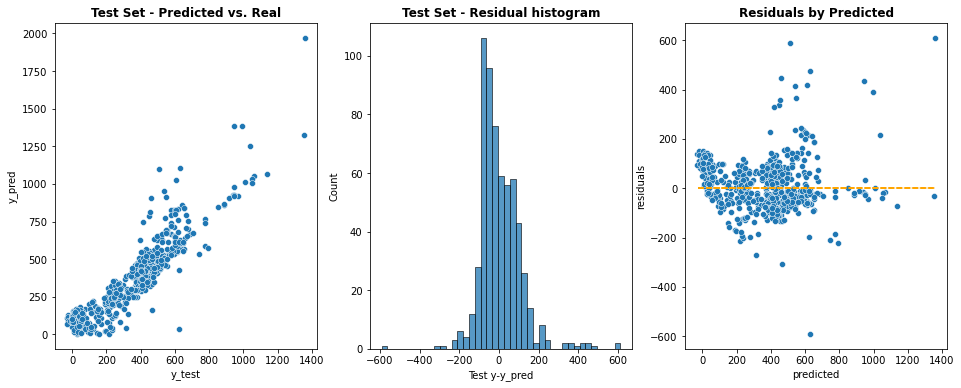

In [31]:
#Y_test and Y_pred scatterplot
fig1, ax1 = plt.subplots(1,3, figsize=(16,6))

sns.scatterplot(x=Y_pred, y=Y_test, ax=ax1[0])
ax1[0].set_xlabel("y_test")
ax1[0].set_ylabel("y_pred")
ax1[0].set_title('Test Set - Predicted vs. Real', fontweight='bold')

sns.histplot(Y_test-Y_pred, ax = ax1[1])
ax1[1].set_xlabel("Test y-y_pred")
ax1[1].set_title('Test Set - Residual histogram', fontweight='bold')

sns.scatterplot(x = Y_pred,y = Y_test - Y_pred, ax=ax1[2])
ax1[2].set_xlabel("predicted")
ax1[2].set_ylabel("residuals")
ax1[2].set_title('Residuals by Predicted', fontweight='bold')
ax1[2].plot(Y_pred,np.zeros(len(Y_pred)),linestyle='dashed', color='orange')